In [1]:
import numpy as np
from random import randint
import torch
import torchvision
import numpy as np
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn as nn
from PIL import Image
import os
from torchvision import datasets,transforms

/home/king/mambaforge/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/king/mambaforge/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
#Pytorch possibilida o usa facil de gpu
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
#print(f"Using {device} device")

In [3]:
#transformando as imagens (image augmentation)
#Normalize = normalifor image_file in os.listdir(dir):ze a tensor image with mean and standard deviation.
#Pode transformar em grayscale? (acho que nao kkkkk)
## Pre processamento

transforms = transforms.Compose([
    #transforms.RandomRotation(50,fill=1),
    #transforms.RandomCrop(size=(224, 224)),
    #transforms.RandomResizedCrop((224,224)),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),  # Converte para tensor
])

In [4]:
#Creating a custom dataset (rotulando, etc...)
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, target_transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_name = self.data.loc[idx, 'img_name']
        image_path = os.path.join(self.img_dir, image_name)
        image = Image.open(image_path)
        label = str(self.data.loc[idx, 'labels'])
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.transform(label)
        
        return image, label

# data = pd.read_csv('data_labels.csv')
image_name = data.loc[10, 'img_name']
label = data.loc[10,'labels']
print(image_name)
print('classe: ',label)
Image.open(os.path.join('data/',image_name))

In [5]:
#train_dataset = datasets.ImageFolder(root='data/train/',transform=transform)
from torchvision.transforms import ToTensor

train_dataset = CustomDataset(csv_file='train_set.csv', img_dir='data/', transform=transforms,target_transform=None )
test_dataset = CustomDataset(csv_file='test_set.csv',img_dir='data/', transform=transforms)
val_dataset = CustomDataset(csv_file='val_set.csv',img_dir='data/', transform=transforms)


train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)    

In [9]:
def get_data_dimensions(dataloader):
    for batch, (X, y) in enumerate(dataloader):
        print(batch)
        print(f"Shape of X [N, C, H, W]: {X.shape}")
        print(f'Length of X: {len(X)}')
        print(f"Length/type of y: {len(y)} {type(y)}")
        print(f"Size of dataloader: {len(dataloader)}")
        break

get_data_dimensions(train_loader)

0
Shape of X [N, C, H, W]: torch.Size([32, 3, 224, 224])
Length of X: 32
Length/type of y: 32 <class 'tuple'>
Size of dataloader: 20


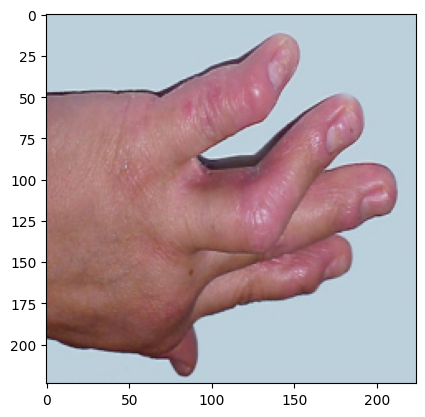

Label: psoriasis


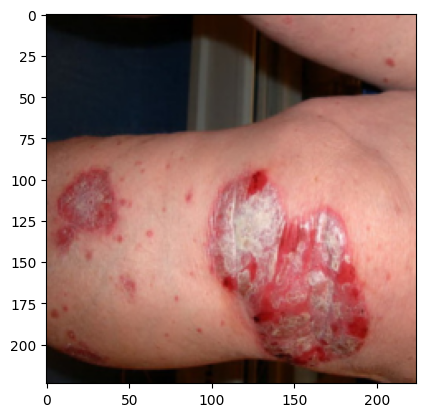

Label: psoriasis


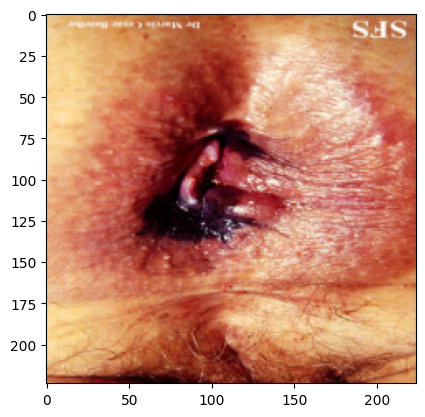

Label: melanome


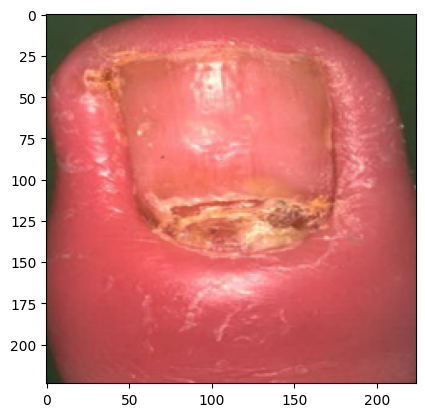

Label: psoriasis


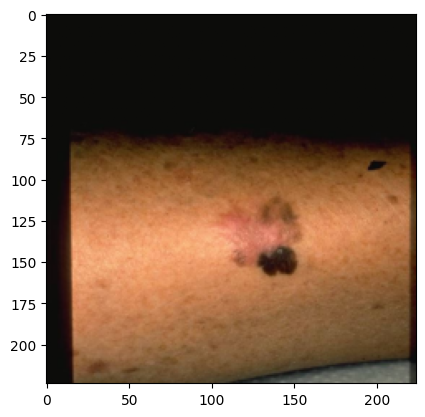

Label: melanome


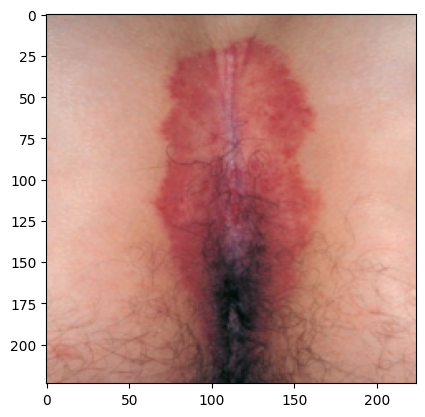

Label: psoriasis


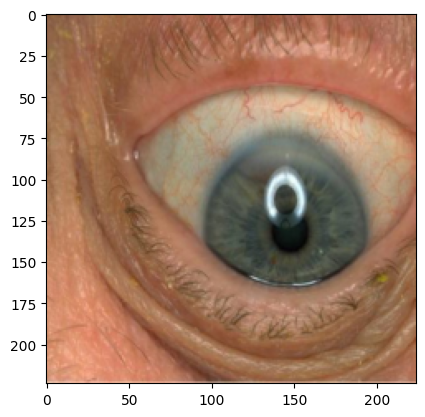

Label: melanome


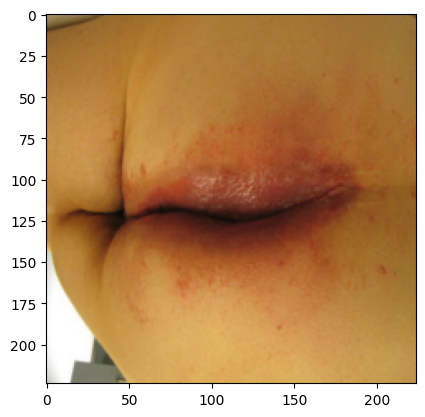

Label: psoriasis


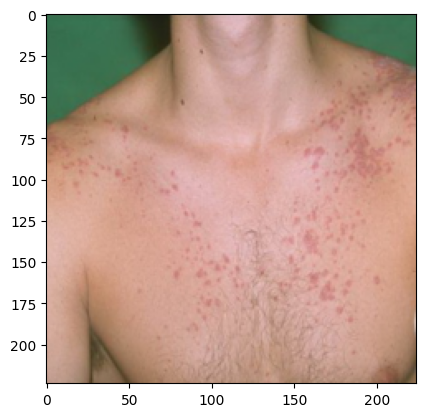

Label: psoriasis


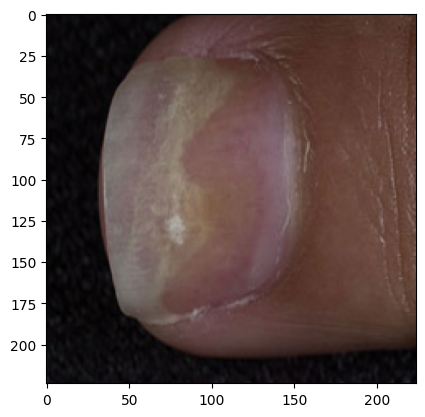

Label: psoriasis


In [7]:
# Display image and label.


def plot_data(dataloader,img_num):
    train_features, train_labels = next(iter(dataloader))
    for i in range(img_num):
        i = randint(0,len(train_features)-1)
        img = train_features[i].squeeze().permute(1, 2, 0)
        label = train_labels[i]
        plt.imshow(img, cmap="gray")
        plt.show()
        print(f"Label: {label}")

plot_data(train_loader,10)

In [13]:
# O resize da nossa imagem foi para 224x224 e ela é colorida ( 3 channels)
input_size = (3, 224, 224)

# tamanho correto do tensor de entrada após as 

In [22]:
# definindo o modelo
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
                    #nn.Conv2d(3, 512, kernel_size=3, padding=0), 
                    #nn.ReLU(),
                    #nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(3, 224, kernel_size=3, padding=0), 
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(224, 128, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(128, 64, kernel_size=3, padding=0),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(64, 32, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(32, 16, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1)
        )

        self.flatten = Flatten()
        flattened_size = self._get_flattened_size(input_size)
 
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

    def _get_flattened_size(self, input_size):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_size)
            output = self.conv_layers(dummy_input)
            flattened_output = self.flatten(output)
            return flattened_output.size(1)


model = NeuralNetwork().to(device)

In [16]:

#batch_labels_numeric = [class_to_idx[label] for label in batch_labels]
class_to_idx = {"psoriasis": 0, "melanome": 1}


def testing_entries(model,dataloader):
    size = len(dataloader)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        batch_labels_numeric = [class_to_idx[label] for label in y]
        batch_labels_tensor = torch.tensor(batch_labels_numeric).float()
        #print(batch)
        print('shape tensor imagem:',X.shape)
        print('shape tensor y antes tranformacao:',len(y))
        print('shape tensor label:',batch_labels_tensor.shape)
        print(batch_labels_tensor)
        break

In [17]:
from torch.utils.tensorboard import SummaryWriter

lst = len(os.listdir('runs/')) # your directory path

writer = SummaryWriter(f'runs/ml-model-test-{lst}')


def train(dataloader, model, loss_fn, optimizer, class_to_idx):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        batch_labels_numeric = [class_to_idx[label] for label in y]
        y = torch.tensor(batch_labels_numeric, dtype=torch.float32)
        X, y = X.to(device), y.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Compute prediction
        pred = model(X)
        pred = pred.squeeze(1)

        # Compute loss and backpropagation
        loss = loss_fn(pred, y)
        writer.add_scalar("Loss/train",loss, batch)
        loss.backward()
        #Performs a single optimization step
        optimizer.step()

        if batch % 100 == 0:
            current = batch * 64
            print(f"Loss: {loss.item():.7f}  [{current:>5d}/{size:>5d}]")


In [12]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")


Model structure: NeuralNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten()
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=7744, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=1, bias=True)
    (4): Sigmoid()
  )
)


Layer: conv_layers.0.weight | Size: to

In [18]:
def test(data, model, loss_fn, class_to_idx):
    size = len(data.dataset)
    num_batches = len(data)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in data:
            batch_labels_numeric = [class_to_idx[label] for label in y]
            y = torch.tensor(batch_labels_numeric, dtype=torch.float32)
            X, y = X.to(device), y.to(device)
            pred = model(X)
            pred = pred.squeeze(1)
            test_loss += loss_fn(pred, y).item()
            correct += (torch.round(pred) == y).sum().item()
    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    print(f"Test Error: Accuracy: {accuracy:.2f}% | Avg loss: {test_loss:.8f}\n")

# Exemplo de uso
class_to_idx = {"psoriasis": 1, "melanome": 0}


In [24]:
# Definir as funções de perda e otimizadores
##input (Tensor) – Tensor of arbitrary shape as probabilities.
##target (Tensor) – Tensor of the same shape as input with values between 0 and 1.
# testar esse learning rate lr=0.01

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer, class_to_idx)
    
    test(test_loader, model, loss_fn, class_to_idx)
print("Done!")
writer.flush()
writer.close()

Epoch 1
-------------------------------
Loss: 0.6830786  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.68482550

Epoch 2
-------------------------------
Loss: 0.6897627  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.68342733

Epoch 3
-------------------------------
Loss: 0.6834214  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.68290740

Epoch 4
-------------------------------
Loss: 0.6836227  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.68169956

Epoch 5
-------------------------------
Loss: 0.6844045  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.68047551

Epoch 6
-------------------------------
Loss: 0.6835147  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.67810513

Epoch 7
-------------------------------
Loss: 0.6758238  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.67933142

Epoch 8
-------------------------------
Loss: 0.6743531  [    0/  637]
Test Error: Accuracy: 70.80% | Avg loss: 0.67417135

Epoch 9


In [ ]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.1 at http://localhost:6006/ (Press CTRL+C to quit)
